In [ ]:
import numpy as np
from sklearn.datasets import load_files
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img, array_to_img
from sklearn.model_selection import train_test_split

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input as preprocess_input_vgg
from keras.applications.vgg16 import decode_predictions as decode_vgg
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
import tensorflow as tf


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dataloc='/content/gdrive/MyDrive/Dataset/PSL'
mdata=tf.keras.utils.image_dataset_from_directory(
    dataloc,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=1509,
    image_size=(224, 224),
    shuffle=True,
)


Found 1509 files belonging to 37 classes.


In [ ]:
class_names = mdata.class_names

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
for images, labels in mdata.take(1):
  for i in range(36):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
df=mdata.unbatch()

In [ ]:
for data, labels in mdata.take(1):
    print(data.shape)
    print(labels.shape)

(1509, 224, 224, 3)
(1509,)


In [ ]:
labels

<tf.Tensor: shape=(1509,), dtype=int32, numpy=array([22, 22,  5, ..., 27, 34,  0], dtype=int32)>

In [ ]:
data

<tf.Tensor: shape=(1509, 224, 224, 3), dtype=float32, numpy=
array([[[[234.54082 , 235.54082 , 226.51021 ],
         [237.19388 , 233.80612 , 227.46939 ],
         [235.69388 , 231.69388 , 226.82654 ],
         ...,
         [ 96.77539 ,  94.77539 ,  93.41821 ],
         [ 92.54083 ,  90.000015,  89.7347  ],
         [100.13274 ,  96.102104,  95.95924 ]],

        [[238.40816 , 237.40816 , 226.40816 ],
         [240.60205 , 236.72449 , 227.29593 ],
         [238.96939 , 234.96939 , 227.54082 ],
         ...,
         [ 96.826485,  94.826485,  93.01015 ],
         [ 95.142876,  92.49999 ,  90.71429 ],
         [100.46941 ,  96.46941 ,  95.20412 ]],

        [[241.85715 , 239.92857 , 228.92857 ],
         [241.      , 237.      , 227.      ],
         [242.80612 , 239.66327 , 229.09184 ],
         ...,
         [ 97.5918  ,  95.5918  ,  94.23462 ],
         [ 97.88776 ,  93.071434,  91.52039 ],
         [ 99.14286 ,  95.14286 ,  91.14286 ]],

        ...,

        [[120.86735 , 104.80612

#**Checking Dataset Balance**

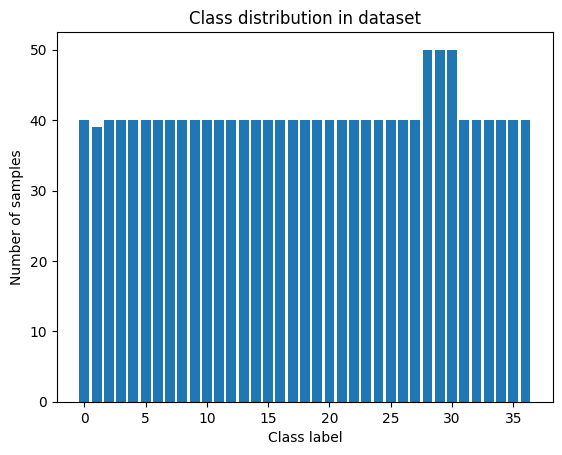

In [ ]:
import matplotlib.pyplot as plt

# Assume that y is a list or array containing the class labels of your dataset
unique_labels, counts = np.unique(labels, return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()

In [ ]:
print(counts)

[40 39 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40
 40 40 40 40 50 50 50 40 40 40 40 40 40]


we can easily see that the method class indices by flow from directory keras has assigned the class label to each and every folder, we have 37 folders representing 37 urdu letters , these 37 folders assigned with Label 0 -36
Using Dataframe we can easily check the assosiated target with each class.
---
'Ain ع': 0, 'Aliph ا': 1,'Bari yeh ے': 2, 'Bay ب': 3, 'Chay چ': 4, 'Chhoti yeh ی': 5, 'Daal  د': 6, 'Daal ڈ': 7, 'Dhaal ذ': 8, 'Dhuaad ض': 9, 'Djay ژ': 10, 'Fay ف': 11, 'Gaaf گ': 12, 'Ghain غ': 13, 'Hamza \u200d\u200cء': 14, 'Hay ہ': 15, 'Jeem ج': 16, 'Kaaf ک': 17, 'Khay خ': 18, 'Laam ل': 19, 'Meem م': 20, 'Noon ن': 21, 'Pay پ': 22, 'Quaaf ق': 23, 'Ray ر': 24, 'Seen س': 25, 'Sheen \u200e\u200eش': 26, 'Suaad ص': 27, 'Tay ت': 28, 'Tey ٹ': 29, 'Thay ث': 30, "Toay'n ط": 31, 'Vao و': 32, 'Zay ز': 33, "Zoay'n ظ": 34, 'aRay ڑ': 35, 'hey ح': 36



#**Testing whether the labels are correctly assigned or not**

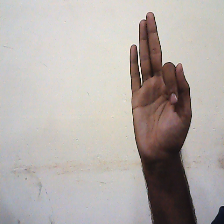

Fay ف': 11


In [ ]:
img_no=40
display(array_to_img(data[img_no]))

if labels[img_no]==0:
    print('Ain ع: 0')
elif labels[img_no]==1:
     print("Aliph ا': 1")
elif labels[img_no]==2:
    print("Bari yeh ے': 2")
elif labels[img_no]==3:
    print("Bay ب': 3, '")
elif labels[img_no]==4:
    print("'Chay چ': 4")
elif labels[img_no]==5:
    print("Chhoti yeh ی': 5")
elif labels[img_no]==6:
    print(" 'Daal د': 6")
elif labels[img_no]==7:
    print("Daal ڈ': 7,")
elif labels[img_no]==8:
    print("Dhaal ذ': 8,")
elif labels[img_no]==9:
    print("'Dhuaad ض': 9,")
elif labels[img_no]==10:
    print("Djay ژ': 10")
elif labels[img_no]==11:
    print("Fay ف': 11")
elif labels[img_no]==12:
    print("Gaaf گ': 12,")
elif labels[img_no]==13:
    print("'Ghain غ': 13")
elif labels[img_no]==14:
    print("Hamza : 14,ء ")
elif labels[img_no]==15:
    print("'Hay ہ': 15,")
elif labels[img_no]==16:
    print(" 'Jeem ج': 16,")
elif labels[img_no]==17:
    print("Kaaf ک': 17")
elif labels[img_no]==18:
    print("'Khay خ': 18")
elif labels[img_no]==19:
    print("'Laam ل': 19")
elif labels[img_no]==20:
    print("'Meem م': 20")
elif labels[img_no]==21:
    print("'Noon ن': 21")
elif labels[img_no]==22:
    print("Pay پ': 22")
elif labels[img_no]==23:
    print("'Quaaf ق': 23")
elif labels[img_no]==24:
    print("'Ray ر': 24")
elif labels[img_no]==25:
    print("'Seen س': 25")
elif labels[img_no]==26:
    print("Sheen ش': 26,")

elif labels[img_no]==27:
    print("'Suaad ص': 27,")
elif labels[img_no]==28:
    print("'Tay ت': 28")
elif labels[img_no]==29:
    print("'Tey ٹ': 29")
elif labels[img_no]==30:
    print("'Thay ث': 30")
elif labels[img_no]==31:
    print("Toay'n ط: 31")
elif labels[img_no]==32:
    print("Vao و': 32")
elif labels[img_no]==33:
    print("Zay ز': 33")
elif labels[img_no]==34:
    print("oay'n ظ: 34")
elif labels[img_no]==35:
    print("aRay ڑ': 35")
elif labels[img_no]==36:
    print("hey ح': 36")
else:
  print("NOT DEFINED")

#**====== MODEL IMPLEMENTATION =========**

### Preprocessing the images as per requirement of the VGG model

In [ ]:
images = preprocess_input_vgg(data)

In [ ]:
images=np.array(images)

In [ ]:
images.dtype

dtype('float32')

In [ ]:
images.shape

(1509, 224, 224, 3)

In [ ]:
images

array([[[[ 122.571205  ,  118.76182   ,  110.86082   ],
         [ 123.53039   ,  117.02712   ,  113.51388   ],
         [ 122.887535  ,  114.91488   ,  112.01388   ],
         ...,
         [ -10.52079   ,  -22.003609  ,  -26.90461   ],
         [ -14.2043    ,  -26.778984  ,  -31.139168  ],
         [  -7.979759  ,  -20.676895  ,  -23.547264  ]],

        [[ 122.469154  ,  120.62916   ,  114.72816   ],
         [ 123.356926  ,  119.94549   ,  116.92205   ],
         [ 123.601814  ,  118.19039   ,  115.28939   ],
         ...,
         [ -10.928856  ,  -21.952515  ,  -26.853516  ],
         [ -13.224716  ,  -24.279007  ,  -28.537125  ],
         [  -8.734886  ,  -20.309586  ,  -23.210587  ]],

        [[ 124.98957   ,  123.149574  ,  118.17715   ],
         [ 123.061     ,  120.221     ,  117.32      ],
         [ 125.15284   ,  122.88427   ,  119.12612   ],
         ...,
         [  -9.704384  ,  -21.187202  ,  -26.088203  ],
         [ -12.41861   ,  -23.707565  ,  -25.792244  ],
  

- Now 'images' contains the preprocessed 4D tensor of images and 'target' contains the corrresponding labels.

In [ ]:
labels=labels.numpy()

### Spliting into train, valid and test sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(images,labels,train_size=0.7,random_state=0,shuffle=True)
X_train,X_valid,Y_train,Y_valid = train_test_split(X_train, Y_train,test_size=0.2,random_state=0,shuffle=True)
print('Shape of X_train:', X_train.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of X_valid:', X_valid.shape)
print('Shape of Y_valid:', Y_valid.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_test:', Y_test.shape)


Shape of X_train: (844, 224, 224, 3)
Shape of Y_train: (844,)
Shape of X_valid: (212, 224, 224, 3)
Shape of Y_valid: (212,)
Shape of X_test: (453, 224, 224, 3)
Shape of Y_test: (453,)


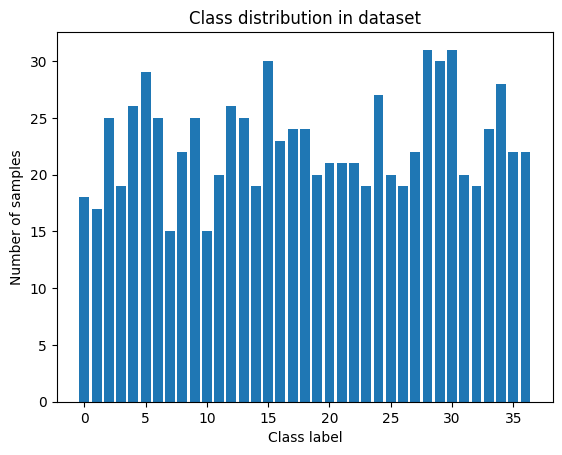

[18 17 25 19 26 29 25 15 22 25 15 20 26 25 19 30 23 24 24 20 21 21 21 19
 27 20 19 22 31 30 31 20 19 24 28 22 22]


In [ ]:
unique_labels_split, counts_split = np.unique(Y_train, return_counts=True)

plt.bar(unique_labels_split, counts_split)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()
print(counts_split)

#**VGG**

In [ ]:
%%time
vgg_case3 = VGG16(weights = "imagenet", include_top=False, input_shape = (224,224, 3))
#include_top is false to ignore the fully connected classifier part on top of the model.

58889256/58889256 [==============================] - 0s 0us/step
CPU times: user 565 ms, sys: 242 ms, total: 807 ms
Wall time: 1.01 s


In [ ]:
vgg_case3.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in vgg_case3.layers[:-5]:
    layer.trainable = False

In [ ]:
vgg_case3.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in vgg_case3.layers[:-5]:
    layer.trainable = False

In [ ]:
vgg_case3.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Adding our custom classfiier

In [ ]:
last_layer_case3 = vgg_case3.get_layer('block5_pool') #Saving the last layer of the network

last_output_case3 = last_layer_case3.output #Saving the output of the last layer to be the input of the next layer

x2 = Flatten()(last_output_case3) #Flattenning the classifier input, which is the output of the last layer of the VGG16 model
x2 = Dense(64, activation='relu', name='FC_2')(x2) #Adding 1 dense layer of 64 neurons
x2 = BatchNormalization()(x2)
x2 = Dropout(0.5)(x2)
# x2 = Dense(1, activation='sigmoid', name='sigmoid')(x2) #Adding our new softmax layer with two hidden units
x2 = Dense(37, activation='softmax', name='softmax')(x2) #Adding our new softmax layer with two hidden units

model_vgg_case3 = Model(inputs=vgg_case3.input, outputs=x2) #Instantiating a new_model

model_vgg_case3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model_vgg_case3.compile(Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


#**Training the model**

In [ ]:
%%time
model_vgg_case3.fit(X_train, Y_train, batch_size=10, epochs=100, verbose=0, validation_data=(X_valid, Y_valid))


CPU times: user 3min 28s, sys: 22.5 s, total: 3min 50s
Wall time: 10min 54s


### Making Prediction on the image

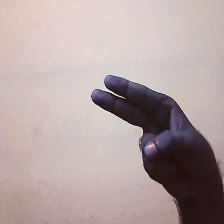

36

In [ ]:
img_no=1
display(array_to_img(X_test[img_no]))
Y_test[img_no]

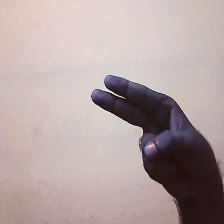

1/1 [==============================] - 0s 21ms/step
0


In [ ]:
img_no=1
display(array_to_img(X_test[img_no]))

selected_img=np.expand_dims(images[img_no], axis=0)

prediction_vgg_case2 = model_vgg_case3.predict(selected_img)
# print(round(prediction_vgg_case2[0][0]*100))
# img1_pred = np.argmax(prediction_vgg_case2, axis=1)
# print('model prediction is : ', img1_pred)
# print('actual output is : ', Y_test[img_no])


In [ ]:
print(prediction_vgg_case2)

[[1.1276580e-05 2.4879389e-06 4.9898613e-06 1.5567878e-06 2.6832035e-06
  1.6365766e-06 3.6467561e-06 2.3894374e-06 2.9520465e-05 1.7111124e-05
  6.8837749e-06 9.6828626e-06 8.4121193e-06 3.6176403e-05 9.0013566e-07
  8.7362037e-05 3.6606868e-06 1.0102233e-06 4.9577957e-06 2.9230929e-07
  1.7120029e-06 4.0010127e-06 9.9968886e-01 1.2801177e-05 3.5569560e-06
  4.2157321e-06 7.4023228e-07 1.1703668e-05 4.0487471e-06 1.2354230e-05
  2.6291762e-06 5.7418896e-07 6.8762693e-06 8.4905287e-07 4.6045466e-07
  7.6768322e-07 7.3161982e-06]]


In [ ]:
predictions=model_vgg_case3.predict(X_test)
Y_pred_classes = np.argmax(predictions, axis=1)
print('Model Predictions are : ', Y_pred_classes)
print('ACtual Answers  are : ', Y_test)

15/15 [==============================] - 2s 133ms/step
Model Predictions are :  [11 36 22 15 21 22  5 13 23  6  1 36 18 11  9 13 10 22  6 24  2 23 14 20
  1  7 31  2 31  2 35  6  9 18 11 23 32 28  0 24 26 16 30 21 34  1 20  4
 36  0 33 17 18 23 26 35 16 17 36  4 32 25 16 26 28 13 20 12  0 24  2 10
 21 28 20 31 10 28 11 26 30 22 14 27 29  0 33  7 15 30  2 23  8 34  3 20
  0 22 32 25 26 10 19 26 19 27 13 32 11 15 11 18 31 23  7 36 23 19 25 14
 25 25 13  6 22 20 30 16 27  4 33 35 31 35 30 32  2  0  9 21 29 17 13 10
 20 19 23  6 31  1  8 29 36 36 29 32 33 31 11  3 21 11 35 10  9  4 19  5
 26  1  7  8 26 15 29 23 15  1 16 26 27 28  8  3 34 16  0 20  4  8 20 31
  1 18 20 36 32 35 10  8  8 20 13 28 33 33  1 18 23 29 10 14  5  9 21 22
 17 26 36 32 36 10 32 22 28 24 35 24 23 12 10 12 27  8 21  9 17  6 35  8
 19 10 28 20  2  0  9 22 11  1 21 12 12 29 17 26 22  0 14 17  7 31  5 17
 24 14  8 32 30  1 19 10 16 16 28  3 36 19 20 28 23  0  4 33  6 10  7 21
 21  3 34  1 32 13 17  1 25 34 23 33 11 26  

#**Making Prediction On Test Folder Created by Mehak**

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array
from numpy import asarray
from os import listdir
# define location of dataset
photos, labels = list(), list()
# enumerate files in the directory
folder = "/content/gdrive/MyDrive/Dataset/testPSL/"
# I have created a test folder of 6 images manually. I have selected randomly 6 images from
#6 different class , i haven't assigned them the labels
for file in listdir(folder):
  if file.startswith('t'):
   photo = load_img(folder + file, target_size=(224, 224))
   photo= img_to_array(photo)
   photos.append(photo)
len(photos)

6

In [ ]:
test_data = asarray(photos)
test_data.shape

(6, 224, 224, 3)

In [ ]:
predictions_testPSL=model_vgg_case3.predict(test_data)
Y_pred_testPSL = np.argmax(predictions_testPSL, axis=1)
print('Model Predictions are : ', Y_pred_testPSL)

1/1 [==============================] - 2s 2s/step
Model Predictions are :  [33 35 12 18  3  1]


we can easily see that the method class indices by flow from directory keras has assigned the class label to each and every folder, we have 37 folders representing 37 urdu letters , these 37 folders assigned with Label 0 -36
Using Dataframe we can easily check the assosiated target with each class.
---
'Ain ع': 0, 'Aliph ا': 1,'Bari yeh ے': 2, 'Bay ب': 3, 'Chay چ': 4, 'Chhoti yeh ی': 5, 'Daal  د': 6, 'Daal ڈ': 7, 'Dhaal ذ': 8, 'Dhuaad ض': 9, 'Djay ژ': 10, 'Fay ف': 11, 'Gaaf گ': 12, 'Ghain غ': 13, 'Hamza \u200d\u200cء': 14, 'Hay ہ': 15, 'Jeem ج': 16, 'Kaaf ک': 17, 'Khay خ': 18, 'Laam ل': 19, 'Meem م': 20, 'Noon ن': 21, 'Pay پ': 22, 'Quaaf ق': 23, 'Ray ر': 24, 'Seen س': 25, 'Sheen \u200e\u200eش': 26, 'Suaad ص': 27, 'Tay ت': 28, 'Tey ٹ': 29, 'Thay ث': 30, "Toay'n ط": 31, 'Vao و': 32, 'Zay ز': 33, "Zoay'n ظ": 34, 'aRay ڑ': 35, 'hey ح': 36



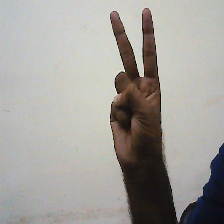

Model Predictions are :  35


In [ ]:
test_img_no=1
display(array_to_img(test_data[test_img_no]))
print('Model Predictions are : ', Y_pred_testPSL[1])

#**Making Prediction On Test Folder of All 36 Classes**

In [ ]:
test_folder_36='/content/gdrive/MyDrive/Dataset/PSL'
mdata=tf.keras.utils.image_dataset_from_directory(
    dataloc,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=1509,
    image_size=(224, 224),
    shuffle=True,
)

#**DataFrame To Compare Actual Vs. Prediction**

In [ ]:
import pandas as pd
act = pd.DataFrame(Y_test,columns=['Actual'])
pred = pd.DataFrame(Y_pred_classes,columns=['Prediction'])
compare=pd.concat([act,pred],axis=1)
print(compare)
print('shape of data :', compare.shape)

     Actual  Prediction
0        11          11
1        36          36
2        22          22
3        15          15
4        21          21
..      ...         ...
448      35          35
449      24          24
450      27          27
451      34          34
452       0           0

[453 rows x 2 columns]
shape of data : (453, 2)


#**Graphical Visualization of Model Prediction vs ACtual Output**

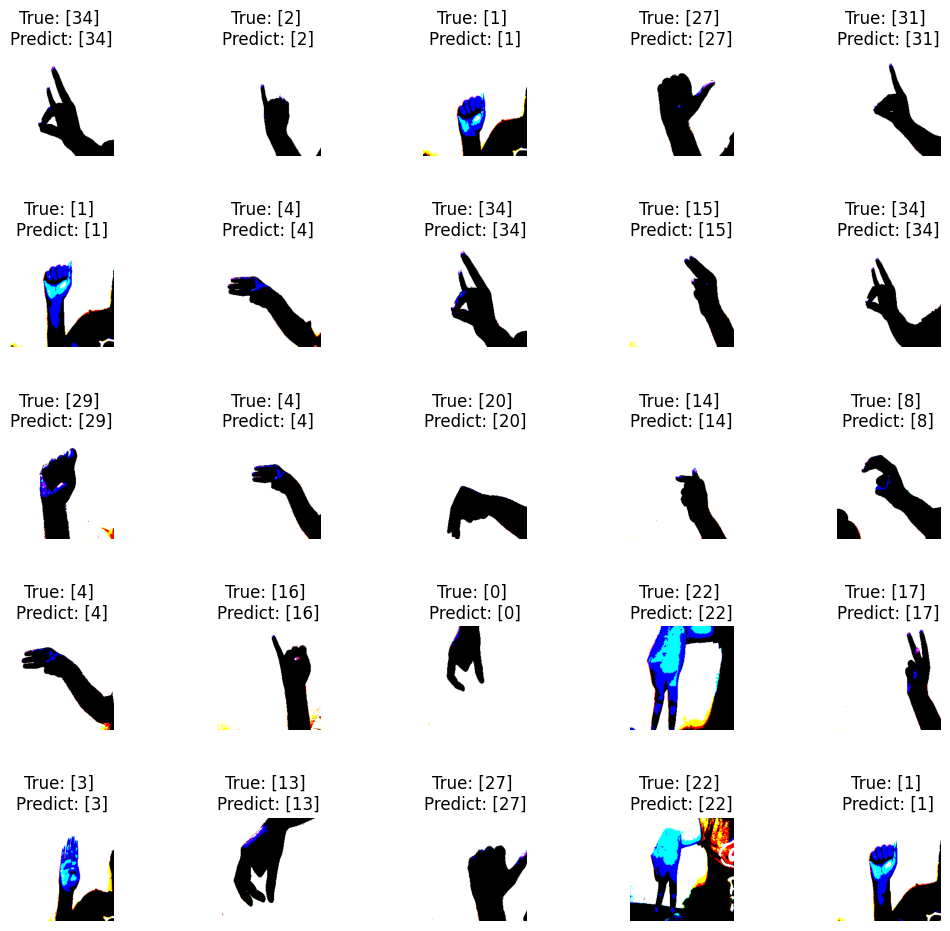

In [ ]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % ([Y_test[i]], [Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

## Model Evaluation
- Now let us evaluate the model for the test dataset that we initially kept aside.

In [ ]:
#Recalling the metrics that we set during compilation of the model.
model_vgg_case3.metrics_names

['loss', 'accuracy']

In [ ]:
#Let us print the loss function value and overall accuracy of our model on train as well as test data.
train_loss, train_accuracy = model_vgg_case3.evaluate(X_train, Y_train)
test_loss, test_accuracy = model_vgg_case3.evaluate(X_test, Y_test)
print(f'Train loss is {train_loss:0.3} and train accuracy is {train_accuracy:0.1%}')
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

15/15 [==============================] - 2s 126ms/step - loss: 0.0400 - accuracy: 0.9956
Train loss is 8.78e-05 and train accuracy is 100.0%
Test loss is 0.04 and test accuracy is 99.6%


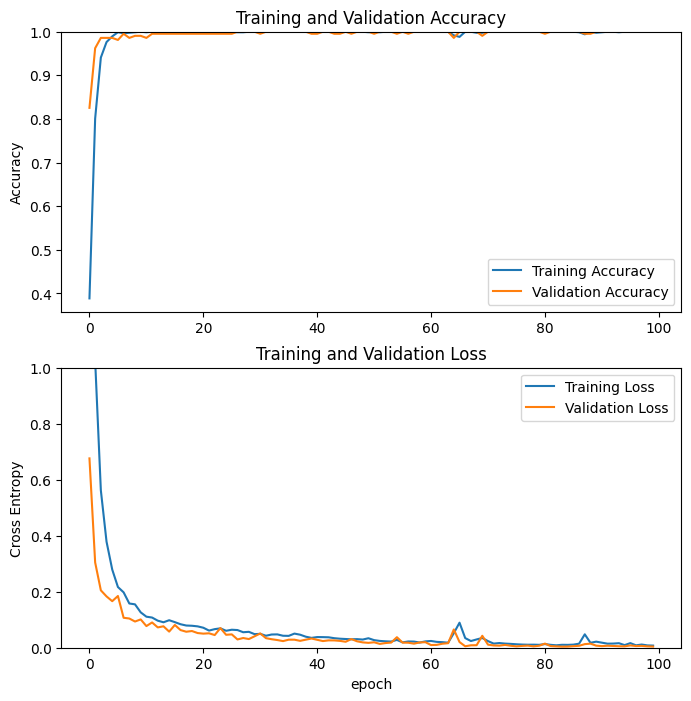

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Confusion Matrix
- Now let us print the confusion matrix and find recall and precision values by using the formulas that we studied in class previously.

In [ ]:
from sklearn.metrics import confusion_matrix
predictions=np.argmax(model_vgg_case3.predict(X_test), axis=1)
conf_matrix = confusion_matrix(Y_test,predictions)

15/15 [==============================] - 2s 126ms/step


In [ ]:
conf_matrix.shape


(37, 37)

In [ ]:
# import matplotlib.pyplot as plt
# # displaying confustion matrix
# plt.figure(figsize=(7,7), dpi=95)
# plt.imshow(conf_matrix, cmap=plt.cm.Greens)
# #class_names

# plt.title('Confusion Matrix', fontsize=16)
# plt.ylabel('Actual Labels', fontsize=12)
# plt.xlabel('Predicted Labels', fontsize=12)
# tick_marks = np.arange(10)
# plt.yticks(tick_marks, class_names)
# plt.xticks(tick_marks, class_names)

# plt.colorbar()

# for i in range(10):
#     for j in range(10):
#         plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
#                  color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')

# plt.show()

In [ ]:
# import cv2
# img = cv2.resize(cv2.imread('mehak.jpeg'), (224,224))

# img = img.reshape(1,224,224,3)
# img=img.astype(np.float32)
# img/255

# predmehak = model_vgg_case3.predict(img)
# print(predmehak)
# print(round(predmehak[0][0]*100))
# mehakpred = np.argmax(predmehak, axis=1)
# mehakpred



import numpy as np
import keras.utils as image
test_image_luna = image.load_img('mehak.jpeg', target_size=(224,224))
test_image2 = image.img_to_array(test_image_luna)
test_image2 = np.expand_dims(test_image2, axis=0)
luna = model_vgg_case3.predict(test_image2)
mehakpred = np.argmax(luna, axis=1)
mehakpred


FileNotFoundError: ignored

In [ ]:
test_loss1, test_accuracy1 = model_vgg_case3.evaluate(luna, np.array([2]))
print(f'Test loss is {test_loss1:0.3} and test accuracy is {test_accuracy1:0.1%}')

#**=========== RESNET ==========**

In [ ]:
from keras.applications import ResNet50

In [ ]:
RenetModel = ResNet50(weights="imagenet", include_top=False,input_shape = (224,224, 3))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
RenetModel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

### Freezing the feature extraction layers

In [ ]:
for layer in RenetModel.layers:
    layer.trainable = False

In [ ]:
RenetModel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

### Adding Resnet custom classfiier

In [ ]:
last_layer_resnet = RenetModel.get_layer('conv5_block1_1_conv') #Saving the last layer of the network

last_output_resnet = last_layer_resnet.output #Saving the output of the last layer to be the input of the next layer

a1 = Flatten()(last_output_resnet) #Flattenning the classifier input, which is the output of the last layer of the VGG16 model
a1 = Dense(64, activation='relu', name='FC_2')(a1) #Adding 1 dense layer of 64 neurons
a1 = BatchNormalization()(a1)
a1 = Dropout(0.5)(a1)
a1 = Dense(37, activation='softmax', name='softmax')(a1) #Adding our new softmax layer with two hidden units

model_resnet = Model(inputs=RenetModel.input, outputs=a1) #Instantiating a new_model

model_resnet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

### Compiling the model

In [ ]:
model_resnet.compile(Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


#**Training the model**

In [ ]:
%%time
model_resnet.fit(X_train, Y_train, batch_size=10, epochs=100, verbose=0, validation_data=(X_valid, Y_valid))



CPU times: user 2min 9s, sys: 13.5 s, total: 2min 23s
Wall time: 6min 26s


### Making Prediction on the image

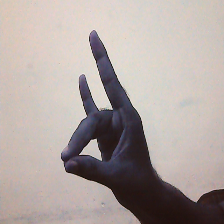

1/1 [==============================] - 2s 2s/step


In [ ]:
img_no=0
display(array_to_img(X_test[img_no]))

selected_img=np.expand_dims(images[img_no], axis=0)

prediction_resnet = model_resnet.predict(selected_img)

# print(round(prediction_vgg_case2[0][0]*100),'% probability that the image contains a dog')


In [ ]:
print(prediction_resnet)

[[7.22454585e-09 1.23233276e-05 4.55383201e-07 1.23040854e-06
  1.05538875e-05 5.90484342e-05 2.53489270e-06 4.99410874e-07
  8.51652294e-06 2.05636625e-05 1.63743971e-06 5.67001462e-06
  2.06658046e-06 9.07982576e-06 6.86629483e-06 1.10318936e-07
  1.73163812e-06 6.19949788e-07 3.25527026e-06 8.16322427e-06
  5.90638649e-07 2.16448061e-05 9.99791682e-01 4.22043172e-07
  3.36738964e-07 4.60376896e-07 2.42726639e-08 1.90844753e-06
  7.00220062e-06 1.04326127e-05 3.10827454e-06 6.05684647e-07
  3.39382460e-08 1.97627674e-06 3.60173726e-06 1.10252938e-06
  6.24078211e-08]]


In [ ]:
predictions=model_resnet.predict(X_test)
Y_pred_classes_resnet = np.argmax(predictions, axis=1)

15/15 [==============================] - 3s 104ms/step


#**Actual vs Pred Resnet**

In [ ]:
import pandas as pd
act = pd.DataFrame(Y_test,columns=['Actual'])
pred = pd.DataFrame(Y_pred_classes_resnet,columns=['Prediction'])
compare=pd.concat([act,pred],axis=1)
print(compare.head(10))
print('shape of data :', compare.shape)

   Actual  Prediction
0      34          34
1       2           2
2       1           1
3      27          27
4      31          31
5       1           1
6       4           4
7      34          34
8      15          15
9      34          34
shape of data : (453, 2)


#**Graphical Visualization of Model Prediction vs ACtual Output**

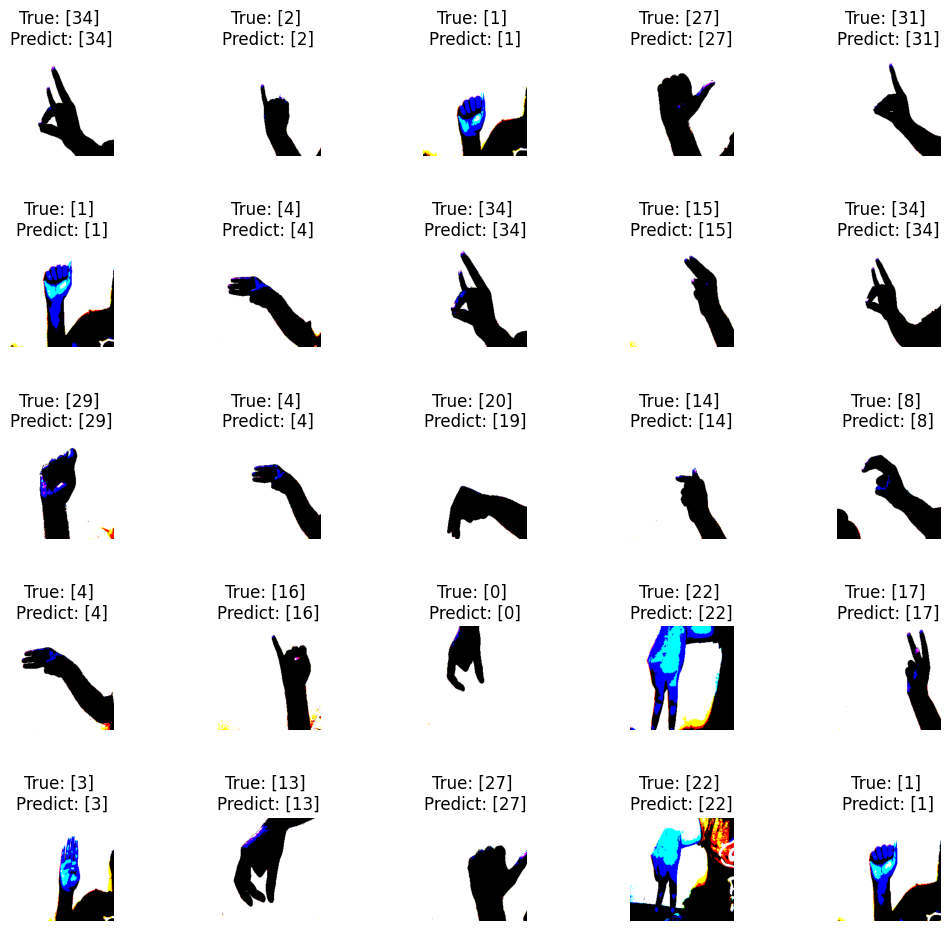

In [ ]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % ([Y_test[i]], [Y_pred_classes_resnet[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

## Model Evaluation
- Now let us evaluate the model for the test dataset that we initially kept aside.

In [ ]:
#Recalling the metrics that we set during compilation of the model.
model_resnet.metrics_names

['loss', 'accuracy']

In [ ]:
#Let us print the loss function value and overall accuracy of our model on train as well as test data.
train_loss, train_accuracy = model_resnet.evaluate(X_train, Y_train)
test_loss, test_accuracy = model_resnet.evaluate(X_test, Y_test)
print(f'Train loss is {train_loss:0.3} and train accuracy is {train_accuracy:0.1%}')
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

15/15 [==============================] - 1s 80ms/step - loss: 0.1057 - accuracy: 0.9691
Train loss is 0.00107 and train accuracy is 100.0%
Test loss is 0.106 and test accuracy is 96.9%


#**Testing 5 samples from Testing Data Using Renset**

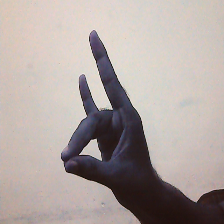

1/1 [==============================] - 0s 116ms/step
[22]


34

In [ ]:
img_no=0
display(array_to_img(X_test[img_no]))

selected_img=np.expand_dims(images[img_no], axis=0)

prediction_resnet = model_resnet.predict(selected_img)
resent_pred1 = np.argmax(prediction_resnet, axis=1)
print(resent_pred1)
Y_test[0]